In [230]:
import pandas as pd
import numpy as np

from datetime import datetime
import time

from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline

from math import log
from collections import Counter

In [231]:
df = pd.read_csv("C:\Users\Anna\Documents\gitlab\data\MessageTracking-anon.csv")
df.head()

,Timestamp,Sender,$_.recipients,MessageSubject,InternalMessageId,clientid,ConnectorId,$_.recipientstatus,TotalBytes,RecipientCount,RelatedRecipientAddress,$_.reference,ReturnPath,MessageInfo,EventId,MessageId
0,19.05.2016 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,SRVEX01\ORT Mail Relay to Customers,NaN,390153,1,NaN,NaN,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,10I: NTS:,RECEIVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....
1,19.05.2016 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,84005a05f147f9afe926d50b09aa8039@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,NaN,390153,1,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,NaN,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,NaN,RESOLVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....
2,19.05.2016 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,84005a05f147f9afe926d50b09aa8039@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,NaN,390654,1,NaN,NaN,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,2016-05-19T00:03:19.201Z;SRV=SRVEX01.slb-bank....,DELIVER,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....
3,19.05.2016 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,0cd4d12b78f52b88563a133f99dbd300@8d192ad005fa7...,55e8a08305b7cd6e53db98494910f990,858592,NaN,NaN,To To To,242816,3,NaN,<S609361SHVW082sllNY001b8dd2@ems.euromoneyplc....,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,03I:,RECEIVE,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...
4,19.05.2016 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,8517f5421476d59f05c4a434d3f12d72@8d192ad005fa7...,55e8a08305b7cd6e53db98494910f990,858592,NaN,NaN,250 2.1.5 RESOLVER.GRP.Expanded; distribution ...,242816,5,f686cdd9f2a4eada60a024761aa6e8dd@8d192ad005fa7...,NaN,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,NaN,EXPAND,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...


In [232]:
from datetime import datetime
import time
TimeAll = []
for t in df.Timestamp:
    d = datetime.strptime(t, "%d.%m.%Y %H:%M:%S")
    TimeAll.append(time.mktime(d.timetuple()))
    
df['TimeAll'] = TimeAll

In [233]:
df.Timestamp = pd.to_datetime(df['Timestamp'], format='%d.%m.%Y %H:%M:%S')

df['Month'] = df.Timestamp.apply(lambda x: x.month)
df['Hour'] = df.Timestamp.apply(lambda x: x.hour)
df['Year'] = df.Timestamp.apply(lambda x: x.year)
df['Day'] = df.Timestamp.apply(lambda x: x.day)
df['Minutes'] = df.Timestamp.apply(lambda x: x.minute)
df['Seconds'] = df.Timestamp.apply(lambda x: x.second)
df = df.drop('clientid', axis = 1)

In [234]:
df.columns = ['Timestamp', 'Sender', 'Recipients', 'MessageSubject', 'InternalMessageId', 'ConnectorId', 
              'RecipientStatus', 'TotalBytes', 'RecipientCount', 'RelatedRecipientAddress', 
              'Reference', 'ReturnPath', 'MessageInfo', 'EventId', 'MessageId', 'TimeAll', 'Month', 'Hour', 'Year', 'Day', 'Minutes', 'Seconds']

df.head()

,Timestamp,Sender,Recipients,MessageSubject,InternalMessageId,ConnectorId,RecipientStatus,TotalBytes,RecipientCount,RelatedRecipientAddress,...,MessageInfo,EventId,MessageId,TimeAll,Month,Hour,Year,Day,Minutes,Seconds
0,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,SRVEX01\ORT Mail Relay to Customers,NaN,390153,1,NaN,...,10I: NTS:,RECEIVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19
1,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,84005a05f147f9afe926d50b09aa8039@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,390153,1,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,...,NaN,RESOLVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19
2,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,84005a05f147f9afe926d50b09aa8039@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,390654,1,NaN,...,2016-05-19T00:03:19.201Z;SRV=SRVEX01.slb-bank....,DELIVER,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19
3,2016-05-19 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,0cd4d12b78f52b88563a133f99dbd300@8d192ad005fa7...,55e8a08305b7cd6e53db98494910f990,858592,NaN,To To To,242816,3,NaN,...,03I:,RECEIVE,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...,1.463621e+09,5,4,2016,19,15,8
4,2016-05-19 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,8517f5421476d59f05c4a434d3f12d72@8d192ad005fa7...,55e8a08305b7cd6e53db98494910f990,858592,NaN,250 2.1.5 RESOLVER.GRP.Expanded; distribution ...,242816,5,f686cdd9f2a4eada60a024761aa6e8dd@8d192ad005fa7...,...,NaN,EXPAND,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...,1.463621e+09,5,4,2016,19,15,8


In [235]:
day_week = []
for  m, d in zip(df.Month, df.Day):
    if m == 5:
        if d in [1, 8, 15, 22, 29]:
            day_week.append(7)
        if d in [2, 9, 16, 23, 30]:
            day_week.append(1)
        if d in [3, 10, 17, 24, 31]:
            day_week.append(2)
        if d in [4, 11, 18, 25]:
            day_week.append(3)
        if d in [5, 12, 19, 26]:
            day_week.append(4)
        if d in [6, 13, 20, 27]:
            day_week.append(5)
        if d in [7, 14, 21, 28]:
            day_week.append(6)
    
    if m == 6:
        if d in [5, 12, 19, 26]:
            day_week.append(7)
        if d in [6, 13, 20, 27]:
            day_week.append(1)
        if d in [7, 14, 21, 28]:
            day_week.append(2)
        if d in [8, 15, 22, 29, 1]:
            day_week.append(3)
        if d in [9, 16, 23, 30, 2]:
            day_week.append(4)
        if d in [10, 17, 24, 3]:
            day_week.append(5)
        if d in [11, 18, 25, 4]:
            day_week.append(6)
            

In [236]:
df['DayWeek'] = day_week
df.head()

,Timestamp,Sender,Recipients,MessageSubject,InternalMessageId,ConnectorId,RecipientStatus,TotalBytes,RecipientCount,RelatedRecipientAddress,...,EventId,MessageId,TimeAll,Month,Hour,Year,Day,Minutes,Seconds,DayWeek
0,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,SRVEX01\ORT Mail Relay to Customers,NaN,390153,1,NaN,...,RECEIVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19,4
1,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,84005a05f147f9afe926d50b09aa8039@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,390153,1,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,...,RESOLVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19,4
2,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,84005a05f147f9afe926d50b09aa8039@8d192ad005fa7...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,390654,1,NaN,...,DELIVER,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19,4
3,2016-05-19 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,0cd4d12b78f52b88563a133f99dbd300@8d192ad005fa7...,55e8a08305b7cd6e53db98494910f990,858592,NaN,To To To,242816,3,NaN,...,RECEIVE,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...,1.463621e+09,5,4,2016,19,15,8,4
4,2016-05-19 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,8517f5421476d59f05c4a434d3f12d72@8d192ad005fa7...,55e8a08305b7cd6e53db98494910f990,858592,NaN,250 2.1.5 RESOLVER.GRP.Expanded; distribution ...,242816,5,f686cdd9f2a4eada60a024761aa6e8dd@8d192ad005fa7...,...,EXPAND,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...,1.463621e+09,5,4,2016,19,15,8,4


In [237]:
df['Recipients'] = df['Recipients'].str.split()
df.head()

,Timestamp,Sender,Recipients,MessageSubject,InternalMessageId,ConnectorId,RecipientStatus,TotalBytes,RecipientCount,RelatedRecipientAddress,...,EventId,MessageId,TimeAll,Month,Hour,Year,Day,Minutes,Seconds,DayWeek
0,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,[9a07926a0c2034df187d91cd270f91ee@8d192ad005fa...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,SRVEX01\ORT Mail Relay to Customers,NaN,390153,1,NaN,...,RECEIVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19,4
1,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,[84005a05f147f9afe926d50b09aa8039@8d192ad005fa...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,390153,1,9a07926a0c2034df187d91cd270f91ee@8d192ad005fa7...,...,RESOLVE,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19,4
2,2016-05-19 02:03:19,99f912969da4765194bdbd392118e7f9@8d192ad005fa7...,[84005a05f147f9afe926d50b09aa8039@8d192ad005fa...,55d3697c4c4b03bfb6d60ebae7e6c425,858559,NaN,NaN,390654,1,NaN,...,DELIVER,<04d61213-32bb-44e1-8655-86a714ac0b75@SRVEX01....,1.463613e+09,5,2,2016,19,3,19,4
3,2016-05-19 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,[0cd4d12b78f52b88563a133f99dbd300@8d192ad005fa...,55e8a08305b7cd6e53db98494910f990,858592,NaN,To To To,242816,3,NaN,...,RECEIVE,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...,1.463621e+09,5,4,2016,19,15,8,4
4,2016-05-19 04:15:08,cbdf58e49d76188667a090f830325853@8d192ad005fa7...,[8517f5421476d59f05c4a434d3f12d72@8d192ad005fa...,55e8a08305b7cd6e53db98494910f990,858592,NaN,250 2.1.5 RESOLVER.GRP.Expanded; distribution ...,242816,5,f686cdd9f2a4eada60a024761aa6e8dd@8d192ad005fa7...,...,EXPAND,<c62b74b5e8734b65a1e97d4b35e57dec@SRVEX01.slb-...,1.463621e+09,5,4,2016,19,15,8,4


In [238]:
df_d = df[df.EventId == 'DELIVER']

#### Количество отправителей, получателей, пользователей

In [239]:
Senders = set(df['Sender'])
        
Recipients = set()
for lst in df[df.EventId == 'DELIVER'].Recipients:
    Recipients.update(lst)
Users = set(Senders.union(Recipients))

Amount_Users = len(Users)

print "Количество отправителей", len(Senders)
print "Количество получателей", len(Recipients)
print "Количество пользователей", len(Users)


Количество отправителей 130
Количество получателей 120
Количество пользователей 137


#### Количество полученных писем за все время

In [240]:
df1 = df[df['EventId'] == 'DELIVER']
AmountMessageD = len(set(df1['MessageId']))
print "Количество уникальных полученых писем за все время", AmountMessageD

Количество уникальных полученых писем за все время 30171


#### Количество отправленных писем за все время

In [241]:
df2 = df[df['EventId'] == 'RECEIVE']
AmountMessageR = len(set(df2['MessageId']))
print "Количество отправленных писем за все время", AmountMessageR

Количество отправленных писем за все время 30663


#### Количество тем

In [242]:
Amount_MessageSubject = len(set(df['MessageSubject']))
print "Количество тем писем:", Amount_MessageSubject

Количество тем писем: 10250


#### cCDF

In [243]:
def cCDF(counter):
    res = {}
    sum_all = sum(counter.values())
    summ = 0.0
    for key in sorted(counter.keys()):
        summ += counter[key]
        res[key] = 1 - (summ/sum_all)
    return res

### Information Load


#### Сколько писем отправляет человек

set([('ea75fcfc0a507ca4ad5260143e50fa1e@8d192ad005fa78b84e4fb97b139c1cef', 1331), ('fade52217e6a14ae415acab04d71c708@8d192ad005fa78b84e4fb97b139c1cef', 1211), ('98d155ef13516b3da007db53832fc146@8d192ad005fa78b84e4fb97b139c1cef', 940)])


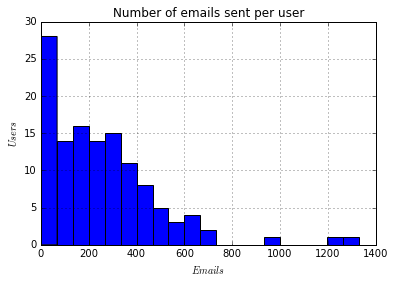

In [244]:
senderCounts = Counter(df[df.EventId == 'RECEIVE'].Sender)
df[df.EventId == 'RECEIVE'].groupby('Sender').apply(lambda subf: len(subf)).hist(bins=20)
counter_dict_s = Counter(senderCounts.values())
#plt.plot(counter_dict_s.keys(), counter_dict_s.values(), 'o', )  
#plt.hist(counter_dict_s.keys(), bins = 20)
plt.xlabel('$Emails$')
plt.ylabel('$Users$')
plt.title('Number of emails sent per user')
print {(k,senderCounts[k]) for k in senderCounts.keys() if senderCounts[k]>800}

 Сколько писем отправляет человек cCDF

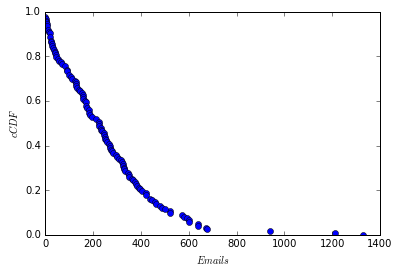

In [245]:
s = cCDF(counter_dict_s)       
plt.plot(s.keys(), s.values(),  'o') 
plt.xlabel('$Emails$')
plt.ylabel('$cCDF$')

#### Сколько писем получает человек

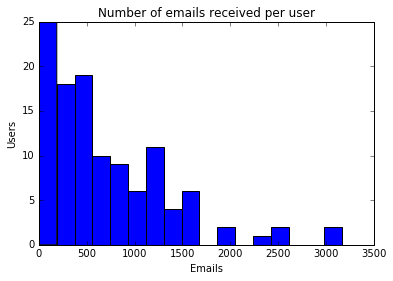

In [246]:
dict_r = {}
for j in Users:
    c = 0
    for rec in df_d.Recipients:
        for r in rec:
            if r == j:
                c +=1
    dict_r[j] = c 
       
counter_dict_r = Counter(dict_r.values())

#plt.plot(counter_dict_r.keys(), counter_dict_r.values(), 'o')
plt.hist(counter_dict_r.keys(), bins = 17, color = 'blue')
plt.xlabel('Emails')
plt.ylabel('Users')
plt.title('Number of emails received per user')

Сколько писем получает человек cCDF

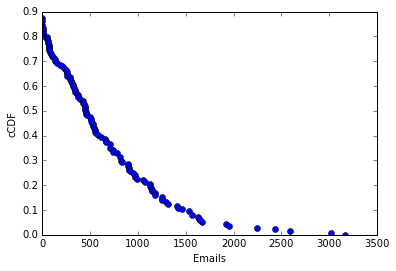

In [247]:
r = cCDF(counter_dict_r)
plt.plot(r.keys(), r.values(), 'o')
plt.xlabel('Emails')
plt.ylabel('cCDF')

#### Соотношение полученых и отправленных писем

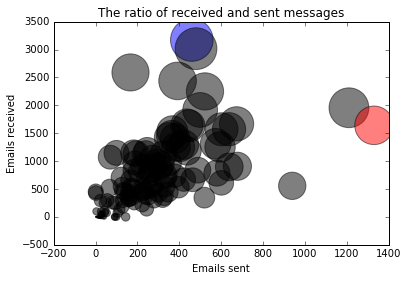

In [248]:
Xs = []
Yr = []
Sz = []
colors = []

for k, v in senderCounts.items():
    Xs.append(v)
    Yr.append(dict_r[k])
    Sz.append((v+dict_r[k])/2)
maxX = max(Xs)
maxY = max(Yr)

for i in range(len(Xs)):
    colors.append([Xs[i]/maxX, 0, Yr[i]/maxY])

plt.scatter(Xs, Yr, Sz, c=colors, alpha = 0.5)
plt.xlabel('Emails sent')
plt.ylabel('Emails received')
plt.title('The ratio of received and sent messages')


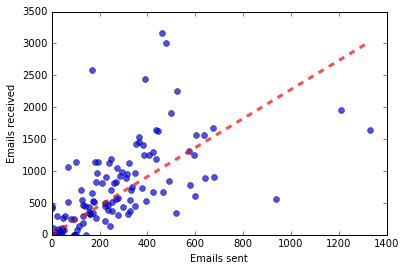

In [249]:
from scipy.optimize import minimize

def QError(w):
    x = np.array(Xs)
    y = np.array(Yr)
    return sum((y - (w[0] + w[1]*x))**2)

w0_opt, w1_opt = minimize(QError, (0,0), bounds = [(0, 0), (-50, 50)], method='L-BFGS-B').x

x = np.sort(np.array(Xs[:]))
Ys = np.array(Yr)
y1 = w0_opt + w1_opt*x
plt.plot(Xs, Ys, 'o', x, y1, 'r--',lw=3,alpha=.7)
plt.xlabel('Emails sent')
plt.ylabel('Emails received')

CC count
(Количество людей в треде)

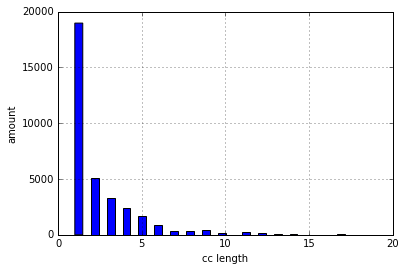

In [250]:
df[df.EventId == 'DELIVER'].groupby('InternalMessageId').apply(lambda subf: subf.Recipients.map(len).sum()).hist(bins=40, range=(1,20))
plt.xlabel('cc length')
plt.ylabel('amount')

### Social Graph

#### Скольколим людям пишет человек

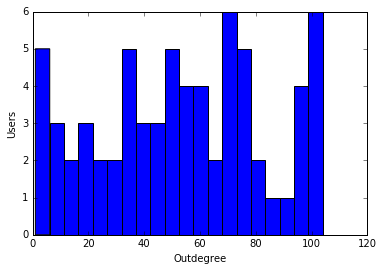

In [251]:
sender_dict1 = {}
for s in set(df[df.EventId == 'RECEIVE'].Sender):
    recipients = df[(df.Sender == s) & (df.EventId == 'DELIVER')].Recipients
    l_r = []
    for st in recipients:
        l_r.extend(st)

    amount_recipients = len(set(l_r))
    sender_dict1[s] = amount_recipients
    
values_sender_dict1 = sender_dict1.values()
counter_values_sender_dict1 = Counter(values_sender_dict1)
#plt.plot(counter_values_sender_dict1.keys(), counter_values_sender_dict1.values(), 'o')
plt.hist(counter_values_sender_dict1.keys(), bins = 20)
plt.xlabel('Outdegree')
plt.ylabel('Users')


Скольким людям пишет человек cCDF

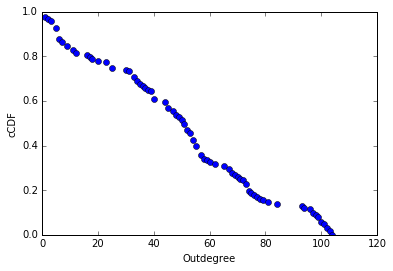

In [252]:
c = cCDF(counter_values_sender_dict1)
plt.plot(c.keys(), c.values(), 'o')
plt.xlabel('Outdegree')
plt.ylabel('cCDF')

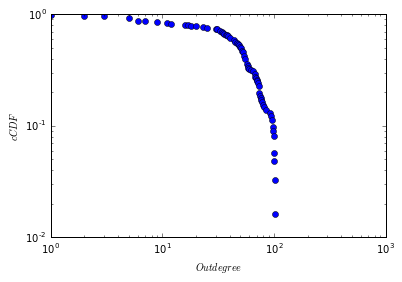

In [253]:
#Логарифмические координаты
plt.loglog(c.keys(), c.values(), 'o')
plt.xlabel('$Outdegree$')
plt.ylabel('$cCDF$')

#### От скольких людей человек получает письма

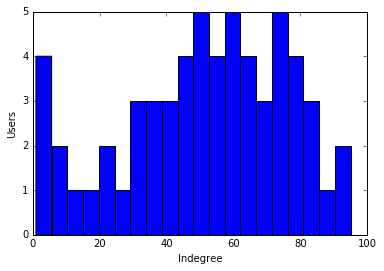

In [254]:
from collections import defaultdict

rec_dict = defaultdict(int)
set_r = set()
for s, r in zip(df_d.Sender, df_d.Recipients):
    for i in r:
        set_r.add((s, i))
        
for i in set_r:
    rec_dict[i[1]] +=1
        
        
values_rec_dict = rec_dict.values()
counter_values_rec_dict = Counter(values_rec_dict)
#plt.plot(counter_values_rec_dict.keys(), counter_values_rec_dict.values(), 'o')
plt.hist(counter_values_rec_dict.keys(), bins = 20)
plt.xlabel('Indegree')
plt.ylabel('Users')

От скольких людей человек получает письма cCDF

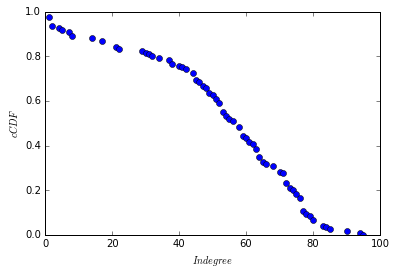

In [255]:
d = cCDF(counter_values_rec_dict)
plt.plot(d.keys(), d.values(), 'o')
plt.xlabel('$Indegree$')
plt.ylabel('$cCDF$')

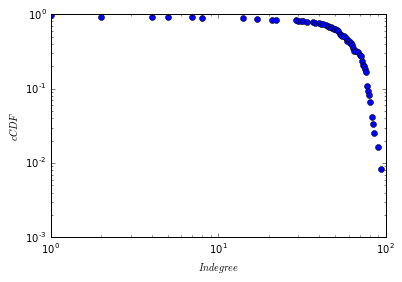

In [256]:
#Логорифмические координаты
plt.loglog(d.keys(), d.values(), 'o')
plt.xlabel('$Indegree$')
plt.ylabel('$cCDF$')

#### Со сколькими людьми взаимодействует человек

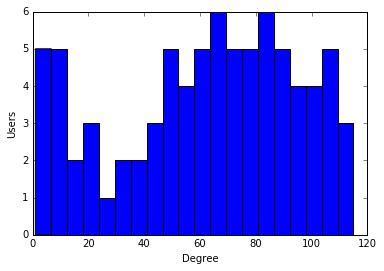

In [257]:
dict_urs ={}
for u in Users:
    c = 0
    a = []
    for s, r in zip(df_d.Sender, df_d.Recipients):
        if s == u:
            for i in r:
                    a.append(i)
        for j in r:
            if j == u:
                    a.append(s)
    c = len(set(a))
    dict_urs[u]=c

counter_dict_urs = Counter(dict_urs.values())

#plt.plot(counter_dict_urs.keys(), counter_dict_urs.values(), 'o')
plt.hist(counter_dict_urs.keys(), bins = 20)
plt.ylabel('Users')
plt.xlabel('Degree')
                
            

Со сколькими людьми взаимодействует человек cCDF

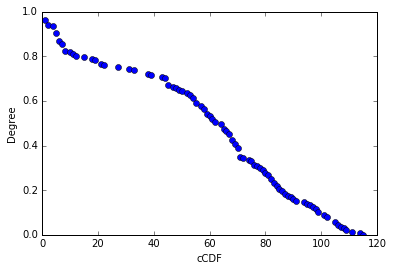

In [258]:
u = cCDF(counter_dict_urs)
plt.plot(u.keys(), u.values(), 'o')
plt.xlabel('cCDF')
plt.ylabel('Degree')


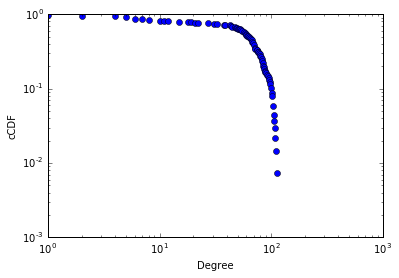

In [259]:
#Логорифмические координаты
u = cCDF(counter_dict_urs)
plt.loglog(u.keys(), u.values(), 'o')
plt.ylabel('cCDF')
plt.xlabel('Degree')

#### Сколько писем между двумя людьми

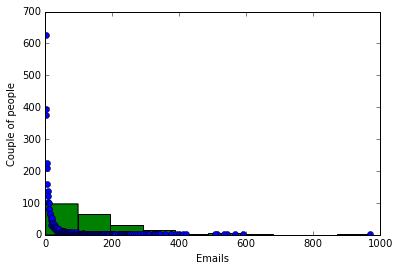

In [260]:
new_list = []
for s, r in zip(df_d.Sender, df_d.Recipients):
    for i in r:
        new_list.append(tuple(sorted(list((s, i)))))

new_dict = Counter(new_list)
new_dict
    
values_new_dict = new_dict.values()
counter_values_new_dict = Counter(values_new_dict)

plt.plot(counter_values_new_dict.keys(), counter_values_new_dict.values(), 'o')
plt.hist(counter_values_new_dict.keys())
plt.xlabel('Emails')
plt.ylabel('Couple of people')

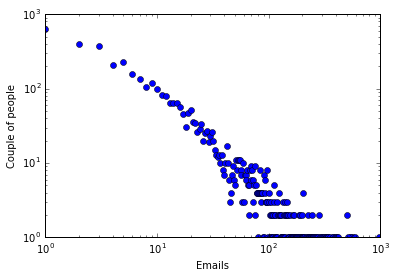

In [261]:
plt.loglog(counter_values_new_dict.keys(), counter_values_new_dict.values(), 'o')
plt.xlabel('Emails')
plt.ylabel('Couple of people')

Медиана

In [262]:
def plot_median(lst_X, lst_Y, xlabel, ylabel):
    X = np.array(lst_X)
    Y = np.array(lst_Y)
    bins = np.linspace(X.min(),X.max(), X.size)
    delta = bins[1]-bins[0]
    idx  = np.digitize(X,bins)
    running_median = [np.median(Y[idx == k]) for k in range(X.size)]
    plt.loglog(X, Y, 'o')
    plt.loglog(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    
    

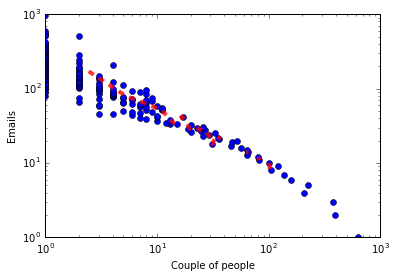

In [263]:
plot_median(list(counter_values_new_dict.values()), list(counter_values_new_dict.keys()), 'Couple of people', 'Emails')


Сколько писем между двумя людьми cCDF

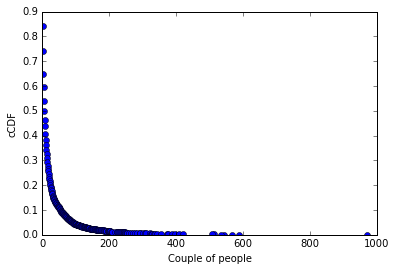

In [264]:
f = cCDF(counter_values_new_dict)
plt.plot(f.keys(), f.values(), 'o')
plt.xlabel('Couple of people')
plt.ylabel('cCDF')

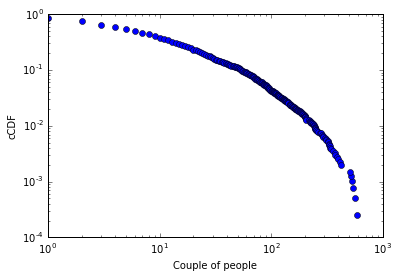

In [265]:
#Логорифмические координаты
plt.loglog(f.keys(), f.values(), 'o')
plt.xlabel('Couple of people')
plt.ylabel('cCDF')

### User’s Email Activity in Time

#### Inter-send  time

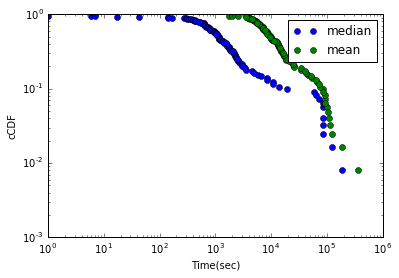

In [266]:
df_r = df[df.EventId == 'RECEIVE']

time_median_s = {}
time_mean_s = {}

for s in set(df_r.Sender):
    
    list_time = []
    for i in df_r[df_r.Sender == s].TimeAll:
        list_time.append(i)
    
    delta_lst = []
    for i in range(len(list_time)-1):
        delta_lst.append(list_time[i+1] - list_time[i])     
    
    
    if len(delta_lst)>0:
        delta_mean = sum(delta_lst)/len(delta_lst)
        delta_median = np.median(delta_lst)
    else:
        delta_mean = 0
        delta_median = 0
    
    time_median_s[s] = int(delta_median)
    time_mean_s[s] = int(delta_mean)
    
c_med = cCDF(Counter(time_median_s.values()))
c_mean = cCDF(Counter(time_mean_s.values()))
plt.loglog(c_med.keys(), c_med.values(), 'o', label = 'median')
plt.loglog(c_mean.keys(), c_mean.values(), 'o', label = 'mean')
plt.xlabel('Time(sec)')
plt.ylabel('cCDF')
plt.legend()

#### Inter-received time 

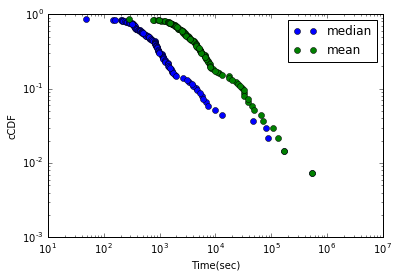

In [267]:
df_d = df[df.EventId == 'DELIVER']

time_median_r = {}
time_mean_r = {}
for u in Users:
    list_time_r = []
    for rec, t in zip(df_d.Recipients, df_d.TimeAll):
        for r in rec:
            if r == u:
                list_time_r.append(t)
                
    delta_lst_r = []
    for i in range(len(list_time_r)-1):
        delta_lst_r.append(list_time_r[i+1] - list_time_r[i])
    
    
    if len(delta_lst_r)>0:
        delta_mean_r = sum(delta_lst_r)/len(delta_lst_r)
        delta_median_r = np.median(delta_lst_r)
    else:
        delta_mean_r = 0
        delta_median_r = 0
    
    time_median_r[u] = int(delta_median_r)
    time_mean_r[u] = int(delta_mean_r)
    
c_med_r = cCDF(Counter(time_median_r.values()))
c_mean_r = cCDF(Counter(time_mean_r.values()))
plt.loglog(c_med_r.keys(), c_med_r.values(), 'o', label = 'median')
plt.loglog(c_mean_r.keys(), c_mean_r.values(), 'o', label = 'mean')
plt.xlabel('Time(sec)')
plt.ylabel('cCDF')
plt.legend()


### How Do Users Process Emails?

#### Время отвта на письмо, которое было прислано в определенное время

In [268]:
#список тем, которые соответствуют тредам (поиск тредов)
list_ms = []
for ms in set(df_d.MessageSubject):
    df1 = df_d[df_d.MessageSubject == ms]
    
    a = []
    for rec in df1.Recipients:
        for r in rec:
            a.append(r)
            
    
    if (len(df1) > 1 and list(df1.Sender)[0] in set(a)):
        list_ms.append(ms)
        
list_ms_filter = []
for ms in list_ms:
    df1 = df_d[df_d.MessageSubject == ms]
    
    k = 0
    for s in list(df1.Sender):
        if s == list(df1.Sender)[0]:
            k += 1
            
    if k != len(df1):
        list_ms_filter.append(ms)
    
list_ms = list_ms_filter
len(list_ms)

3333

In [1]:
dict_f ={1: 3, 2: 4}
for i in dict_f:
    print(i)

1
2


In [269]:
reply = {}
for ms in list_ms:
    df1 = df_d[(df_d.MessageSubject == ms)]

    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
    
    timeAll_new = list(df1.TimeAll)
    for i in  range(len(timeAll_new)-1):
        delta = (timeAll_new[i+1] - timeAll_new[i])/3600
        day_week = list(df1[df1.TimeAll == timeAll_new[i]].DayWeek)[0]
        hour = list(df1[df1.TimeAll == timeAll_new[i]].Hour)[0]
        

        if day_week not in reply:
            reply[day_week] = {}
        if hour not in reply[day_week]:
            reply[day_week][hour] = []
        reply[day_week][hour].append(delta)

In [270]:
for d_w in reply:
    for h in reply[d_w]:
        reply[d_w][h] = [np.median(reply[d_w][h])]
        

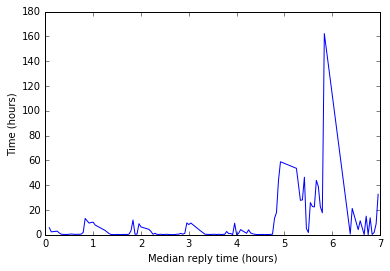

In [271]:
H = []
R = []
for k in reply.keys():
    hours = reply[k].keys()
    hoursW = []
    for h in hours:
        H.append((k-1) + (h / 24.0))
    
    for r in reply[k].values():
        R.append(r)
    
plt.plot(H, R, '-', color = 'blue')
plt.xlabel('Median reply time (hours)')
plt.ylabel('Time (hours)')
# 1- 7 - дни недели (пн - вс)

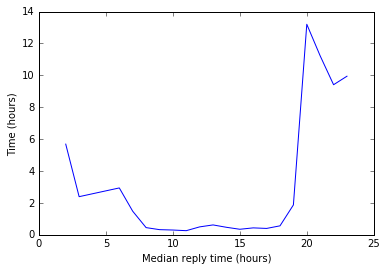

In [272]:
# Понедельник
one = reply[1]
plt.plot(one.keys(), one.values(), '-')
plt.xlabel('Median reply time (hours)')
plt.ylabel('Time (hours)')

### Анализ тредов

In [273]:
#Количество тредов
len(list_ms)

3333

#### Распределение длин тредов

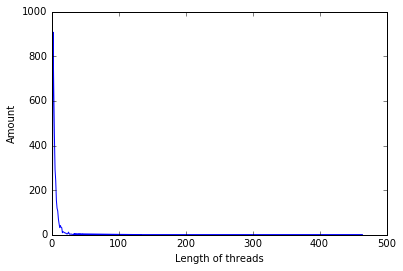

In [274]:
length_thread = []
for ms in list_ms:
    df1 = df_d[(df_d.MessageSubject == ms)]
    
    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
            
    length_thread.append(len(df1))
    
counter_length_thread = Counter(length_thread)
plt.plot(counter_length_thread.keys(), counter_length_thread.values())
plt.xlabel('Length of threads')
plt.ylabel('Amount')

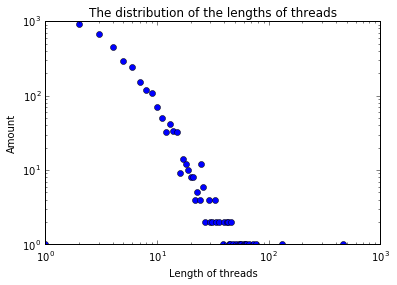

In [292]:
#Логарифмические координаты
plt.loglog(counter_length_thread.keys(), counter_length_thread.values(), 'o')
plt.xlabel('Length of threads')
plt.ylabel('Amount')
plt.title('The distribution of the lengths of threads')

#### Зависимость длины тредов от количества людей в треде

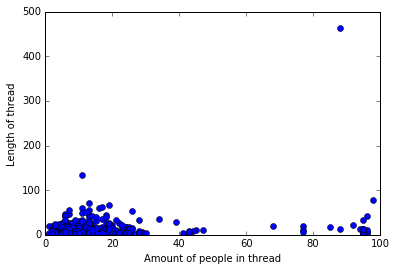

In [276]:
length_threads = []
threads_people = []
for ms in list_ms: 
    df1 = df_d[(df_d.MessageSubject == ms)]
    
    count_people = set()
    #count_people.add(list(df1.Sender)[0])
    for rec in df1.Recipients:
        for i in rec:
            count_people.add(i)
    threads_people.append(len(count_people))

    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
    length_threads.append(len(df1))
        
plt.plot(threads_people, length_threads, 'o')
plt.ylabel('Length of thread')
plt.xlabel('Amount of people in thread')

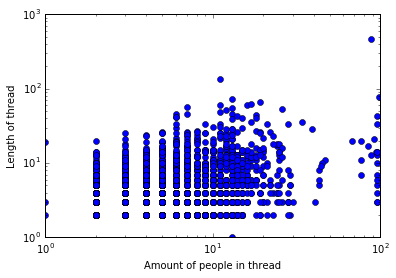

In [277]:
#Логарифмические координаты
plt.loglog(threads_people, length_threads, 'o')
plt.ylabel('Length of thread')
plt.xlabel('Amount of people in thread')

#### Получатели, которые не пишут в треде

###### Зависимость количества получателей, которые не пишут в треде от длины треда

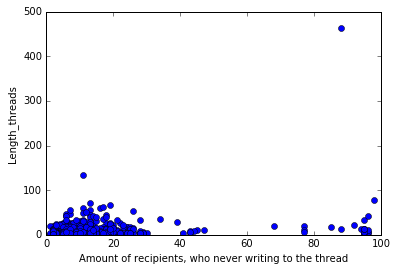

In [278]:
length_threads = []
amount_people_off = []
for ms in list_ms:
    df1 = df_d[(df_d.MessageSubject == ms)]
    
    a = set()
    for rec in df1.Recipients:
        for r in rec:
            a.add(r)
    k = 0
    for i in df1.Sender:
        if k == 0: continue
        if i in a:
            a.remove(i)
        k +=1
    amount_people_off.append(len(a))

    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
            
    length_threads.append(len(df1))
    
plt.plot(amount_people_off,  length_threads,  'o')
plt.xlabel('Amount of recipients, who never writing to the thread')
plt.ylabel('Length_threads')    

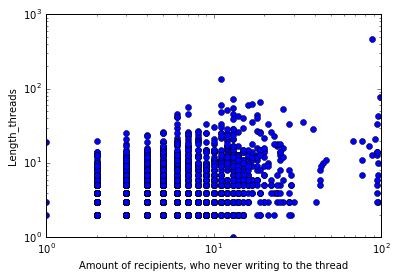

In [279]:
#Логарифмические координаты
plt.loglog(amount_people_off,  length_threads,  'o')
plt.xlabel('Amount of recipients, who never writing to the thread')
plt.ylabel('Length_threads') 

#### Reaction time analysis 

###### Распределение времени реакции на каждый овтет

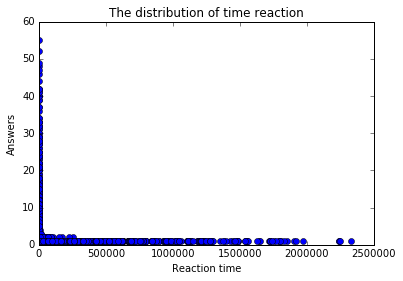

In [280]:
time_reaction = []
for ms in list_ms:
    df1 = df_d[(df_d.MessageSubject == ms)]

    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
               
    timeAll_new = list(df1.TimeAll)
    for i in  range(len(timeAll_new)-1):
        delta = (timeAll_new[i+1] - timeAll_new[i])
        time_reaction.append(delta)
        
counter_time_reaction = Counter(time_reaction)
plt.plot(counter_time_reaction.keys(), counter_time_reaction.values(), 'o')
plt.xlabel('Reaction time')
plt.ylabel('Answers')
plt.title('The distribution of time reaction')

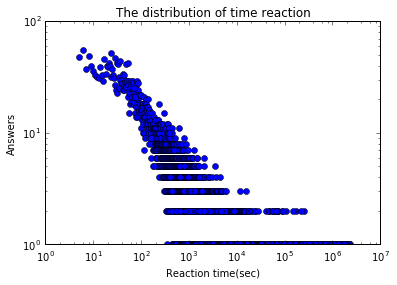

In [281]:
#Логарифмические координаты
plt.loglog(counter_time_reaction.keys(), counter_time_reaction.values(), 'o')
plt.xlabel('Reaction time(sec)')
plt.ylabel('Answers')
plt.title('The distribution of time reaction')

###### Зависимость времени реакции от длины треда

6cbd2ebd9d45973fa48b6c0f1252c930


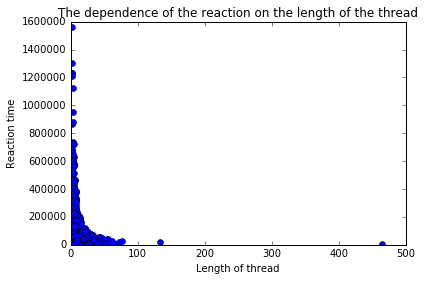

In [283]:
times_reaction = []
length_threads = []

for ms in list_ms:
    df1 = df_d[(df_d.MessageSubject == ms)]
    assert len(df1) > 1

    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
            
    if len(df1) <= 1:
        print(ms)
            
    length_threads.append(len(df1))
    
    time_reaction = []
    timeAll_new = list(df1.TimeAll)
    for i in  range(len(timeAll_new)-1):
        delta = (timeAll_new[i+1] - timeAll_new[i])
        time_reaction.append(delta)
    
    times_reaction.append(np.mean(time_reaction))
    #print time_reaction
    
plt.plot(length_threads, times_reaction, 'o')
plt.ylabel('Reaction time')
plt.xlabel('Length of thread')
plt.title('The dependence of the reaction on the length of the thread')
    

In [284]:
#print times_reaction

908


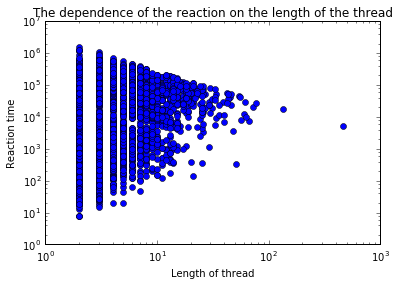

In [291]:
#Логарифмические координаты
plt.loglog(length_threads, times_reaction, 'o')
plt.ylabel('Reaction time')
plt.xlabel('Length of thread')
plt.title('The dependence of the reaction on the length of the thread')
i = 0
for t in length_threads:
    if t == 2:
        i+=1
print(i)

###### Зависимость времени реакции от количества людей в треде

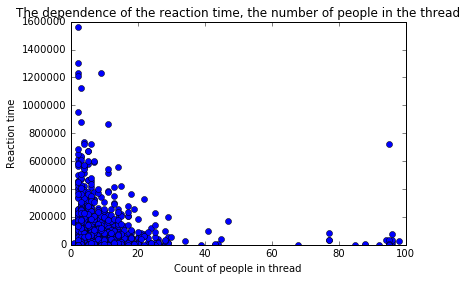

In [286]:
times_reaction = []
counts_people = []
for ms in list_ms:
    df1 = df_d[(df_d.MessageSubject == ms)]
    
    count_people = set()
    #count_people.add(list(df1.Sender)[0])
    for rec in df1.Recipients:
        for i in rec:
            count_people.add(i)
    counts_people.append(len(count_people))
    
    timeAll = list(df1.TimeAll)
    for t in range(len(timeAll)-1):
        if (timeAll[t+1] - timeAll[t]) < 5:
            firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].InternalMessageId)[0]
            df1 = df1[df1.InternalMessageId != firstToDeleteID]
            
    time_reaction = []
    timeAll_new = list(df1.TimeAll)
    for i in  range(len(timeAll_new)-1):
        delta = (timeAll_new[i+1] - timeAll_new[i])
        time_reaction.append(delta)
    
    times_reaction.append(np.mean(time_reaction))
    
    
plt.plot(counts_people, times_reaction, 'o')
plt.ylabel('Reaction time')
plt.xlabel('Count of people in thread')
plt.title('The dependence of the reaction time, the number of people in the thread')

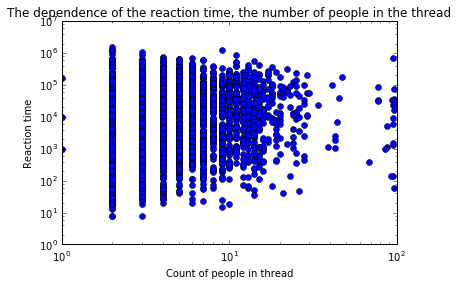

In [287]:
#Логарифмические координаты
plt.loglog(counts_people, times_reaction, 'o')
plt.ylabel('Reaction time')
plt.xlabel('Count of people in thread')
plt.title('The dependence of the reaction time, the number of people in the thread')

#### "Мертвые души"

In [288]:
amount_die = 0
for r in Recipients:
    if r not in Senders:
        amount_die += 1
        
print "Количество людей, от которых не поступало никаких писем:", amount_die, " Из", Amount_Users, 

Количество людей, от которых не поступало никаких писем: 7  Из 137


In [289]:
#Проверка
a = 0
all_sender = list(df.Sender)
for r in Recipients:
    if r not in all_sender:
        a += 1
a

7